<a href="https://colab.research.google.com/github/Shinhunjun/Data_Analytic_Project/blob/main/%5BRevenue%5D_Churn(prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 통신사 고객 데이터 분석을 통한 CLV 도출 및 해지 고객 예측 
통신사 고객 데이터 분석을 통해 CLV를 도출하고 해지고객을 예측해봅니다. 

## 데이터 설명
데이터는 [다음의 링크](https://drive.google.com/file/d/16sV-UvLTmrup9zYRxpsEuqMP0VweOwEm/view?usp=sharing)에서 다운받으실 수 있습니다(https://www.kaggle.com/blastchar/telco-customer-churn).


---


* 해지 여부
  * **Churn** - 고객이 지난 1개월 동안 해지했는지 여부 (Yes or No)
* Demographic 정보
  * **customerID** - 고객들에게 배정된 유니크한 고객 번호 입니다. 
  * **gender** - 고객의 성별 입니다(male or a female). 
  * **Age** - 고객의 나이 입니다. 
  * **SeniorCitizen** - 고객이 senior 시민인지 여부(1, 0). 
  * **Partner** - 고객이 파트너가 있는지 여부(Yes, No).
  * **Dependents** - 고객이 dependents가 있는지 여부(Yes, No). 

* 고객의 계정 정보
  * **tenure** - 고객이 자사 서비스를 사용한 개월 수. 
  * **Contract** - 고객의 계약 기간 (Month-to-month, One year, Two year)
  * **PaperlessBilling** -  고객이 paperless billing를 사용하는지 여부 (Yes, No)
  * **PaymentMethod** - 고객의 지불 방법 (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

  * **MonthlyCharges** - 고객에게 매월 청구되는 금액
  * **TotalCharges** - 고객에게 총 청구된 금액 

* 고객이 가입한 서비스 
  * **PhoneService** - 고객이 전화 서비스를 사용하는지 여부(Yes, No). 
  * **MultipleLines** - 고객이 multiple line을 사용하는지 여부(Yes, No, No phone service). 
  * **InternetService** - 고객의 인터넷 서비스 사업자 (DSL, Fiber optic, No). 
  * **OnlineSecurity** - 고객이 online security 서비스를 사용하는지 여부 (Yes, No, No internet service)
  * **OnlineBackup** - 고객이 online backup을 사용하는지 여부 (Yes, No, No internet service)
  * **DeviceProtection** - 고객이 device protection에 가입했는지 여부 (Yes, No, No internet service)
  * **TechSupport** 고객이 tech support를 받고있는지 여부 (Yes, No, No internet service)
  * **StreamingTV** - 고객이 streaming TV 서비스를 사용하는지 여부 (Yes, No, No internet service)
  * **StreamingMovies** - 고객이 streaming movies 서비스를 사용하는지 여부 (Yes, No, No internet service)


---







## 문제 정의 

* 분석의 목적 
  * 통신사의 고객 데이터에서 CLV를 계산합니다.   
  * 통신사 고객의 churn 해지를 예측합니다. 

### 데이터 탐색 및 전처리

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# 데이터를 불러옵니다.
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
# 데이터를 확인 합니다. 
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(df.shape)
df.tail()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [3]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
# 결측값이 있는지, 데이터 유형은 어떤지 확인합니다. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# TotalCharges 컬럼이 object입니다. float으로 변환해주고 싶습니다. 
pd.to_numeric(df["TotalCharges"])

ValueError: ignored

In [6]:
# ValueError입니다. 빈 값이 있습니다. 
# 빈 값을 확인합니다. 
df[df["TotalCharges"] == " "]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [7]:
# tenure=0인 가입 첫달 유저들입니다. 
# 아직 납부한 적이 없어서 TotalCharges가 빈 값이었습니다. 
# 빈 값을 nan 으로 대체 해줍니다. 
df["TotalCharges"] = df["TotalCharges"].replace(" ",np.nan)
print(df.shape)
df.tail()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [9]:
# tenure = 0인 유저들을 보니 TotalCharges가 NaN으로 대체되어 있습니다. 
df[df["tenure"] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [10]:
'''
우리는 churn 여부에 관심이 있습니다. 
TotalCharges가 빈 값인, tenure이 0인 유저들에게는 큰 관심이 없습니다. 
그리고 이 유저들은 전체 7042 유저들 중 11명에 불과 합니다. 전체의 0.156%에 불과합니다. 
TotalCharges의 null 값을 버리고 실수로 변환합니다. 
'''
# null 값을 버립니다. 
df = df[df["TotalCharges"].notnull()]
#df = df.reset_index()[df.columns]

# float으로 변환합니다. 
df["TotalCharges"] = df["TotalCharges"].astype(float)

print(df.shape)
df.tail()


(7032, 21)


<ipython-input-10-7ae88053ef8f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TotalCharges"] = df["TotalCharges"].astype(float)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [ ]:
# 기술통계를 확인합니다. 
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


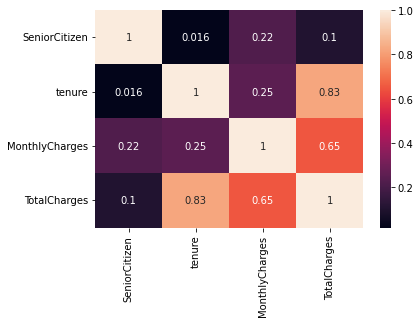

In [12]:
# 변수간의 correlation을 확인합니다. 
corr = df.corr()
sns.heatmap(corr, annot=True)

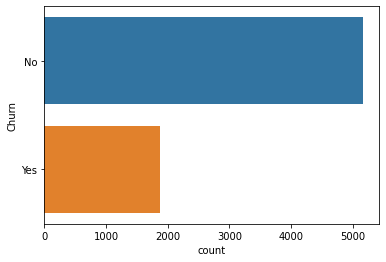

In [14]:
# 해지한 고객 수를 봅니다. 
sns.countplot(y="Churn", data=df)

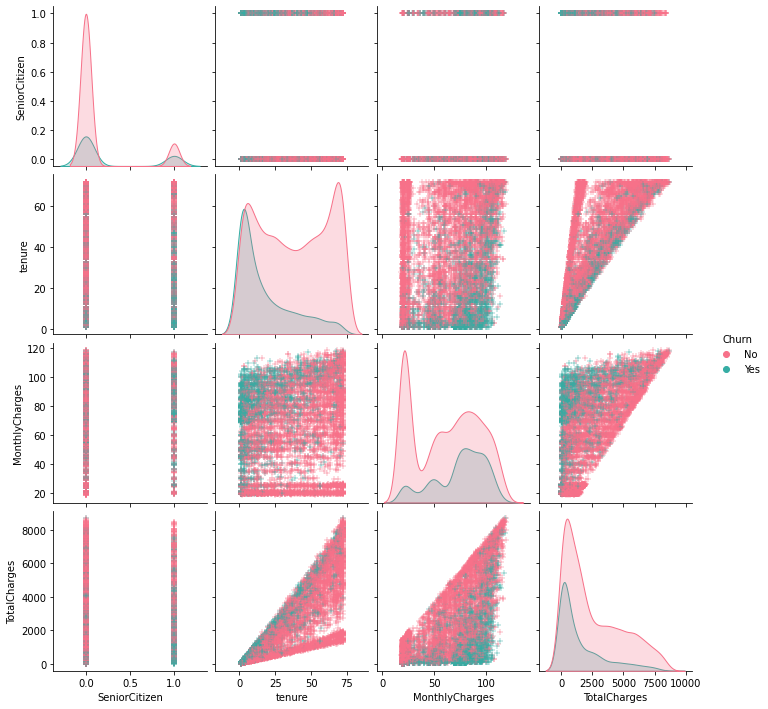

In [15]:
# 변수간의 pairplot을 그려봅니다. 
sns.pairplot(df, markers="+", hue="Churn", palette="husl")
plt.show()

* Pairplot으로 눈으로 볼 수 있는 관계는 이 정도 입니다. 
  - tenure가 낮은 경우 churn이 많습니다. 즉, 최근 고객들이 더 많이 해지합니다. 
  - 어느정도 이상의 tenure이 되면 충성고객이 되어 churn하지 않는 것 같습니다. 
  - MonthlyCharges가 높은 경우의 churn이 많습니다. 
  - tenure과 MonthlyCharges가 아마도 주요한 변수인 것 같습니다. 
  - scatter plot을 봐도 어느 정도 경계선이 보입니다. 
*  pairplot으로 볼 수 있는 관계가 많지 않습니다. 
  * numeric variable이 많지 않기 때문입니다. 
  * categorical variable을 처리해줍니다. 

In [16]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [17]:
# 카테고리 변수의 카테고리가 어떻게 구성되어 있는지 확인 합니다. 
print(df['gender'].value_counts())
print("=================================")
print(df['Partner'].value_counts())
print("=================================")
print(df['Dependents'].value_counts())
print("=================================")
print(df['PhoneService'].value_counts())
print("=================================")
print(df['MultipleLines'].value_counts())
print("=================================")
print(df['InternetService'].value_counts())
print("=================================")
print(df['OnlineSecurity'].value_counts())
print("=================================")
print(df['OnlineBackup'].value_counts())
print("=================================")
print(df['DeviceProtection'].value_counts())
print("=================================")
print(df['TechSupport'].value_counts())
print("=================================")
print(df['StreamingTV'].value_counts())
print("=================================")
print(df['StreamingMovies'].value_counts())
print("=================================")
print(df['Contract'].value_counts())
print("=================================")
print(df['PaperlessBilling'].value_counts())
print("=================================")
print(df['PaymentMethod'].value_counts())
print("=================================")
print(df['Churn'].value_counts())

Male      3549
Female    3483
Name: gender, dtype: int64
No     3639
Yes    3393
Name: Partner, dtype: int64
No     4933
Yes    2099
Name: Dependents, dtype: int64
Yes    6352
No      680
Name: PhoneService, dtype: int64
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64
No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64
No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64
No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV

In [18]:
# 다음 컬럼들에 대해 'No internet service'를 'No'로 변환해줍니다. 
replace_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    df[i]  = df[i].replace({'No internet service' : 'No'})

df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [ ]:
#replace values
#df["SeniorCitizen"] = df["SeniorCitizen"].replace({1:"Yes",0:"No"})
#df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,No,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [19]:
def barplot_percentages(feature, orient='v', axis_name="percentage of customers"):
    ratios = pd.DataFrame()
    g = df.groupby(feature)["Churn"].value_counts().to_frame()
    g = g.rename({"Churn": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(df)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()

# https://www.kaggle.com/jsaguiar/exploratory-analysis-with-seaborn

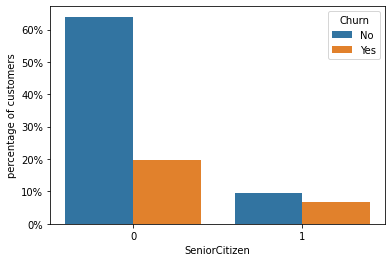

In [20]:
barplot_percentages("SeniorCitizen")

* SeniotCitizen은 전체 고객의 16% 정도에 불과하지만 churn 비율은 훨씬 높습니다. (42% vs 23%)

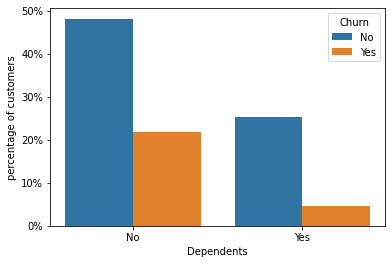

In [21]:
barplot_percentages('Dependents')

* Dependent가 없는 경우 churn을 더 많이 합니다. 

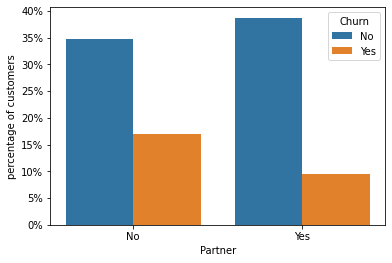

In [22]:
barplot_percentages('Partner')

* Partner가 없는 경우 churn을 더 많이 합니다. 

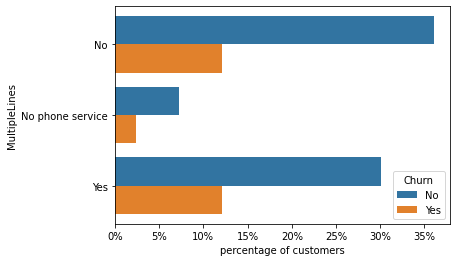

In [23]:
barplot_percentages("MultipleLines", orient='h')

* phone service를 사용하지 않는 고객의 비율은 적습니다. 
* MultipleLines를 사용중인 고객의 churn 비율이 아주 약간 높습니다. 

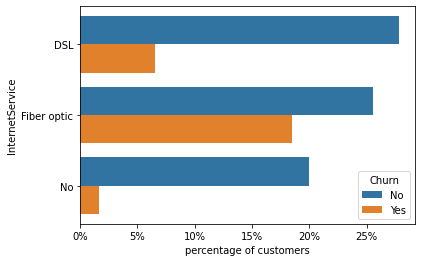

In [24]:
barplot_percentages("InternetService", orient="h")

* 인터넷서비스가 없는 경우의 churn 비율은 매우 낮습니다. 
* Fiber opptic을 사용중인 고객이 DSL 사용중인 고객들보다 churn 비율이 높습니다. 

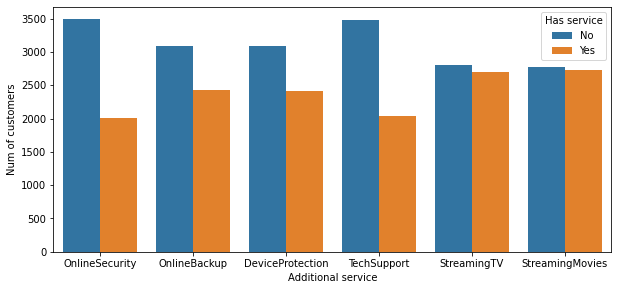

In [25]:
# 6개의 부가 서비스관련 시각화 해봅니다. 
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df1 = pd.melt(df[df["InternetService"] != "No"][cols]).rename({'value': 'Has service'}, axis=1)
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=df1, x='variable', hue='Has service')
ax.set(xlabel='Additional service', ylabel='Num of customers')
plt.show()

* "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport" 부가서비스 사용자는 churn 하는 경우가 적습니다. 
* 스트리밍 서비스 이용 고객 중 churn이 많은 것으로 보입니다. ("StreamingTV", "StreamingMovies")

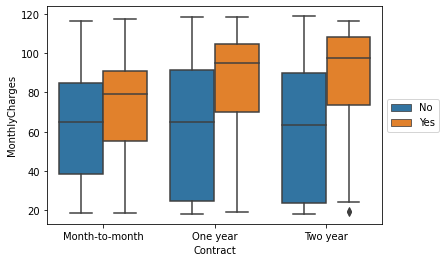

In [26]:
# Contract 유형에 따른 월청구요금과 해지여부를 시각화 합니다. 
ax = sns.boxplot(x="Contract", y="MonthlyCharges", hue="Churn", data=df)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

* 장기계약이고 월청구요금이 높을수록 해지율이 높은 것 같습니다. 
* 전반적으로 월청구요금이 높을때 해지가능성이 높아보입니다. 

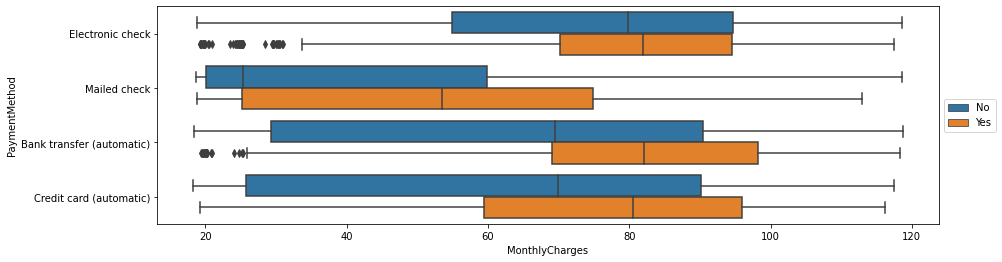

In [ ]:
ax = sns.boxplot(y="PaymentMethod", x="MonthlyCharges", hue="Churn", data=df, orient='h')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

* Mailed check는 상대적으로 월청구요금이 낮습니다. 
* Mailed check에서 해지고객과 비해지 고객의 차이가 큽니다. 

In [ ]:
# tenure에 따른 고객수를 계산합니다. 
print(df['tenure'].value_counts().sort_index())
a = df['tenure'].value_counts().sort_index()
print(a.shape)

1     613
2     238
3     200
4     176
5     133
     ... 
68    100
69     95
70    119
71    170
72    362
Name: tenure, Length: 72, dtype: int64
(72,)


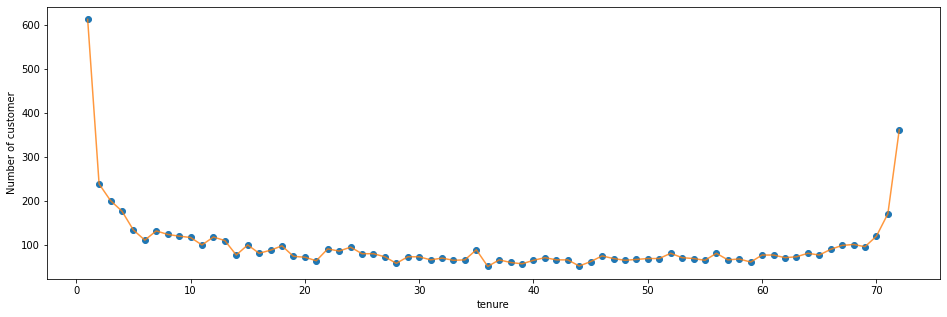

In [ ]:
# tenure에 따른 고객수를 시각화합니다. 
plt.figure(1 , figsize = (16 ,5))
plt.plot(np.arange(1 , 73) , a , 'o')
plt.plot(np.arange(1 , 73) , a , '-' , alpha = 0.8)
plt.xlabel('tenure') , plt.ylabel('Number of customer')
plt.show()

* 6개월 이후 retention이 상당히 낮아진다는 것을 알 수 있습니다. 
* 반면, 장기 충성고객들은 70개월 이상 유지되고 있습니다. 소중한 고객들입니다. 

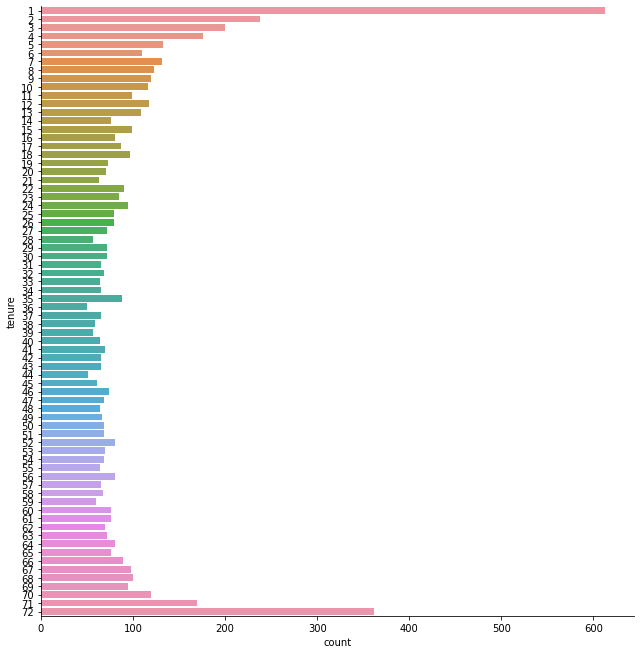

In [ ]:
sns.catplot(y="tenure", kind="count", data=df, height=9)

## 데이터 분석

### CLV(Customer Lifetime Value; LTV)를 계산합니다. 
* CLV는 고객생애 가치를 이야기 합니다. 
* 고객이 확보된 이후 유지되는 기간동안의 가치입니다. 
* CAC와 LTV는 반드시 트래킹해야할 주요 지표라고 할 수 있습니다. 
  - CAC보다 LTV가 최소 3배 이상 높은 것이 이상적입니다. 
![CAC & LTV](https://dskok-wpengine.netdna-ssl.com/wp-content/uploads/2009/12/image3.png)
* LTV (Lifetime value) 
  - 고객당 월 평균 이익(Avg monthly revenue per customer) x 평균 고객 유지개월 수(# months customer lifetime)
  - 고객당 월 평균 이익(Avg monthly revenue per customer) / 월 평균 해지율(Monthly churn)
  - (Average Value of a Sale) x (Number of Repeat Transactions) x (Average Retention Time in Months or Years for a Typical Customer) 
  - PLC(제품수명주기; Product Life Cycle) x ARPU(고객평균매출; Average Revenue Per User) 
  - 고객당 월 평균 이익(Avg Monthly Revenue per Customer x 고객당 매출 총 이익 (Gross Margin per Customer) / 월평균 해지율 (Monthly Churn Rate) 

* CAC (Customer Acquisition Cost) 
  - 전체 세일즈 마케팅 비용 (Total sales and marketing exppense) / # 신규확보 고객 수 (# New customers acquired)

* LTC:CAC Ratio
  - LTV/CAC 
    - 1:1 더 많이 팔수록 더 많이 잃게 됩니다. 
    - 3:1 이상적인 비율입니다. (도메인마다 다를 수 있습니다.)
    - 4:1 좋은 비즈니스 모델입니다. 
    - 5:1 마케팅에 투자를 덜 하고 있는 것으로 보입니다. 

[이미지 출처](https://www.forentrepreneurs.com/startup-killer/)
[formula 출처](https://medium.com/corl/how-to-calculate-lifetime-value-customer-acquisition-cost-ratio-for-your-saas-business-332510188726)




In [27]:
#* LTV (Lifetime value) 
#  - 고객당 월 평균 이익(Avg monthly revenue per customer) x 평균 고객 유지개월 수(# months customer lifetime)
df["MonthlyCharges"].mean() * df["tenure"].mean()

2100.8736469702617

In [ ]:
2100/3

700.0

* LTV는 2100달러입니다. 
* CAC는 700달러 정도인 것이 이상적입니다. 
* 통신사의 CAC는 기기 보조금, 멤버십 혜택 등이 있습니다. 

### Churn 해지할 고객을 예측합니다. 

In [ ]:
# customer ID를 제거합니다. 
df2 = df.iloc[:,1:]
# binary 형태의 카테고리 변수를 numeric variable로 변경해줍니다. 
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

# 모든 categorical 변수를 더미 변수화 시킵니다.
df_dummies = pd.get_dummies(df2)
print(df_dummies.shape)
df_dummies.head()

(7032, 40)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0


In [ ]:
# dummy 변수화한 데이터를 사용합니다. 
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# 변수 값을 0과 1사이 값으로 스케일링 해줍니다.
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features
print(X.shape)
X.tail()

(7032, 39)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
7027,0.0,0.323944,0.662189,0.227521,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7028,0.0,1.000000,0.845274,0.847461,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7029,0.0,0.140845,0.112935,0.037809,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7030,1.0,0.042254,0.558706,0.033210,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7031,0.0,0.915493,0.869652,0.787641,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


In [ ]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
result = model.fit(X_train, y_train)

from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.8075829383886256


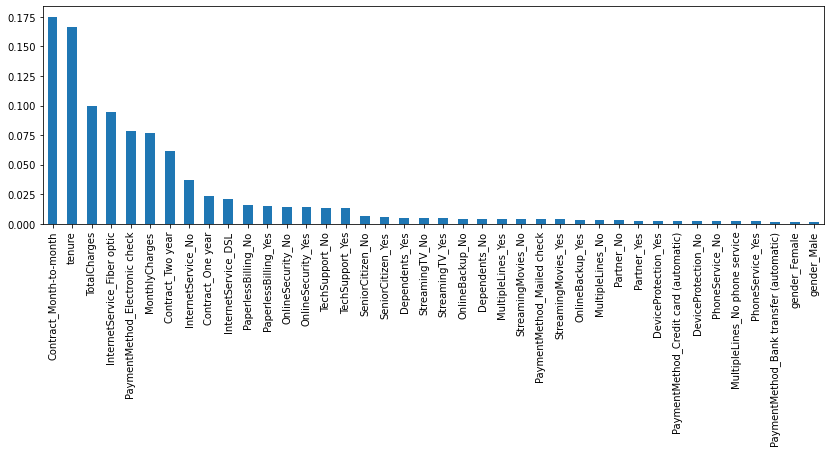

In [ ]:
# 모든 변수의 weights 값을 가져와서 시각화 합니다. 
plt.rcParams["figure.figsize"] = (14,4)
weights.sort_values(ascending = False).plot(kind='bar')

* 데이터 탐색과정에서 주요한 변수일 것으로 보였던 변수들의 weight가 실제로 높습니다. 
  - trnure가 길수록 충성고객의 churn은 낮아집니다. tenure가 아주 긴 유저들의 churn이 낮은 것이 이렇게 나타난 것으로 보입니다. (TotalCharges는 반대로 같은이치) 
  - 인터넷 서비스를 사용하지 않는 것은 고객의 churn을 줄입니다. 
  - Fiber optic 인터넷 서비스 사용과 월단위 계약, Electronic Check를 사용하는 고객일수록 churn이 높아집니다. 


In [ ]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8123667377398721


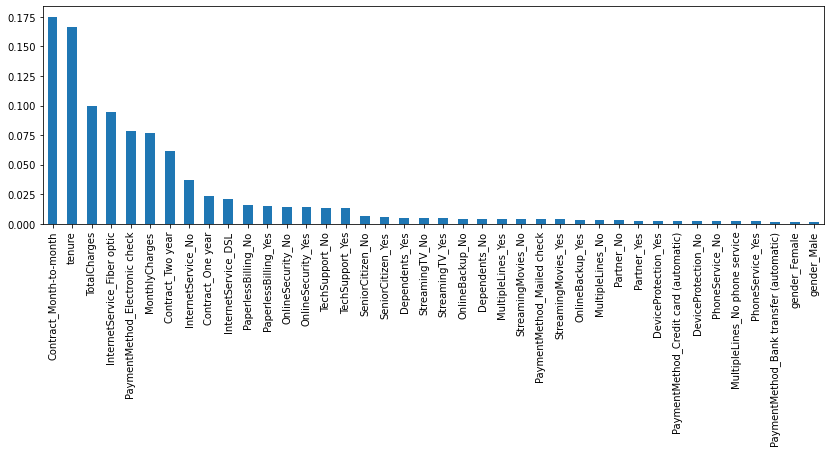

In [ ]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
plt.rcParams["figure.figsize"] = (14,4)
weights.sort_values(ascending = False).plot(kind='bar')

* random forest 알고리즘에서 monthly contract, tenure and total charges가 churn을 예측하는 가장 주요한 변수입니다. 
* logistic regression의 결과와 EDA 결과와 매우 유사합니다. 

### 적용 방안 
  * 중요도가 높은 변수를 활용한 마케팅 전략을 수립해봅니다. 
    - 계약 조건을 변경해볼 수 있습니다. 2년 장기계약을 최대한 유도해봅니다. 
    - 폰 보조금을 많이 지급해서 CAC가 높아지더라도 장기적으로 유지하여 LTV를 높인다면 통신사에게 더 유리합니다. 
    - Fiber opptic 을 사용할수록 해지확률이 높아지는데, 그 이유를 찾아봅니다. 인터넷 통신 통합요금제 등의 영향일 수 있습니다. 
    - etc
  * 매달 고객별 churn을 예측하여 churn할 것으로 예측되는 고객들을 대상으로 선행적 조치를 취합니다. 
    - 예: 새 기기로 교체해주고 보조금을 지급한 뒤 2년 계약하는 쪽으로 유도하는 마케팅 전화를 돌려봅니다. 
    


### 다른 모델을 적용하여 정확도를 높여봅니다. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [ ]:
from sklearn.svm import SVC

model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8161137440758294

* SVM으로 정확도를 높였습니다. 
* Confusion matrix, AUC, ROC 등도 함께 봐야 합니다. 

In [ ]:
# Create the Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,preds))  

[[1437  141]
 [ 247  285]]


In [ ]:
# ADA Boost (AdaBoost Algorithm)
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train,y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8151658767772512

In [ ]:
# XG Boost
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8199052132701422

* XG Boost를 사용하여 정확도가 높아졌습니다. 